In [50]:
import os
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError


In [51]:
# Paths
project_root = r"D:\Graduation_project"
processed_path = os.path.join(project_root, "Data", "Processed")
models_path = os.path.join(project_root, "Models")

In [ ]:
# Load preprocessed data
iso_preds = joblib.load(os.path.join(models_path, "iso_preds.pkl"))
autoencoder = load_model(
    os.path.join(models_path, "autoencoder.keras"),
    custom_objects={"mse": MeanSquaredError()}
)
ae_preds  = joblib.load(os.path.join(models_path, "ae_preds.pkl"))
y_test    = joblib.load(os.path.join(processed_path, "test_labels.pkl"))

c:\Users\reem\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Load saved models
iso_model = joblib.load(os.path.join(models_path, "iso_preds.pkl"))
autoencoder = load_model(
    os.path.join(models_path, "autoencoder.keras"),
    custom_objects={"mse": MeanSquaredError()}
)
ae_threshold = joblib.load(os.path.join(models_path, "ae_threshold.pkl"))

In [54]:
# Ensemble predictions

# AND voting
ensemble_and = ((iso_preds == 1) & (autoencoder == 1)).astype(int)

# OR voting
ensemble_or  = ((iso_preds == 1) | (autoencoder == 1)).astype(int)



=== AND Voting Ensemble ===


c:\Users\reem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\reem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\reem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

         0.0       0.49      1.00      0.66    409643
         1.0       0.00      0.00      0.00    424704

    accuracy                           0.49    834347
   macro avg       0.25      0.50      0.33    834347
weighted avg       0.24      0.49      0.32    834347



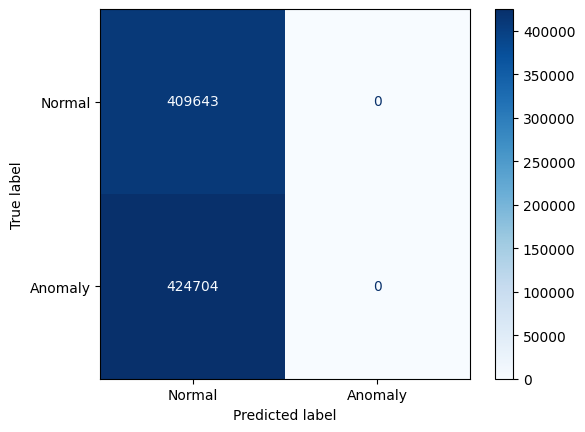

In [55]:
print("\n=== AND Voting Ensemble ===")
print(classification_report(y_test, ensemble_and))
cm = confusion_matrix(y_test, ensemble_and)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomaly"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()


=== OR Voting Ensemble ===
              precision    recall  f1-score   support

         0.0       0.05      0.05      0.05    409643
         1.0       0.09      0.09      0.09    424704

    accuracy                           0.07    834347
   macro avg       0.07      0.07      0.07    834347
weighted avg       0.07      0.07      0.07    834347



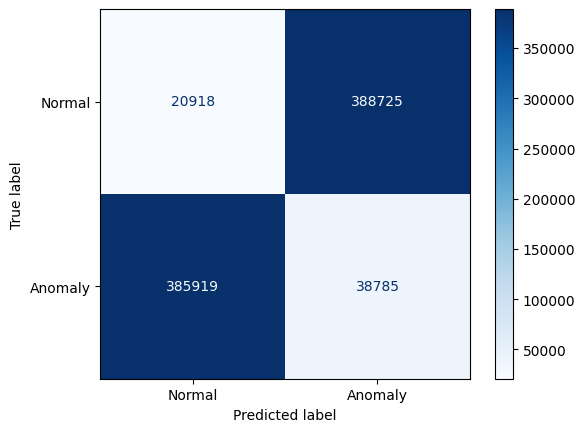

In [56]:
print("\n=== OR Voting Ensemble ===")
print(classification_report(y_test, ensemble_or))
cm_or = confusion_matrix(y_test, ensemble_or)
disp_or = ConfusionMatrixDisplay(confusion_matrix=cm_or, display_labels=["Normal", "Anomaly"])
disp_or.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

In [57]:
print(type(iso_preds))
print(type(ae_preds))


<class 'numpy.ndarray'>
<class 'keras.src.models.functional.Functional'>


In [58]:
test_pred = autoencoder.predict(x_test)
test_mse = np.mean(np.square(x_test - test_pred), axis=1)
ae_preds = (test_mse > ae_threshold).astype(int)


26074/26074 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step


=== Weighted Ensemble Report ===
              precision    recall  f1-score   support

         0.0       0.49      0.99      0.66    409643
         1.0       0.23      0.00      0.00    424704

    accuracy                           0.49    834347
   macro avg       0.36      0.50      0.33    834347
weighted avg       0.36      0.49      0.32    834347



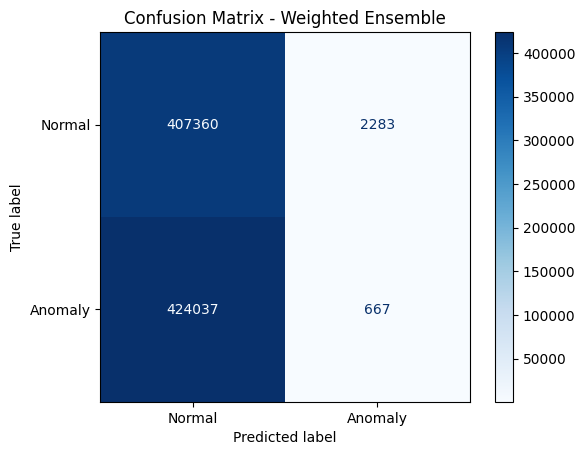

In [61]:
w_iso = 0.4
w_ae  = 0.6
ensemble_score = w_iso * iso_preds + w_ae * ae_preds
ensemble_weighted = (ensemble_score >= 0.5).astype(int)
print("=== Weighted Ensemble Report ===")
print(classification_report(y_test, ensemble_weighted))

cm_weighted = confusion_matrix(y_test, ensemble_weighted)
disp_weighted = ConfusionMatrixDisplay(confusion_matrix=cm_weighted, display_labels=["Normal", "Anomaly"])
disp_weighted.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Weighted Ensemble")
plt.show()

In [46]:
from sklearn.metrics import classification_report
print("Isolation Forest report:\n", classification_report(y_test, iso_preds))
print("Autoencoder report:\n", classification_report(y_test, ae_preds))

c:\Users\reem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\reem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\reem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

Isolation Forest report:
               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00    409643
         1.0       0.09      0.09      0.09    424704

    accuracy                           0.05    834347
   macro avg       0.03      0.03      0.03    834347
weighted avg       0.05      0.05      0.05    834347

Autoencoder report:
               precision    recall  f1-score   support

         0.0       0.74      0.97      0.84    409643
         1.0       0.96      0.68      0.79    424704

    accuracy                           0.82    834347
   macro avg       0.85      0.82      0.82    834347
weighted avg       0.85      0.82      0.82    834347



In [64]:
ensemble_df = pd.DataFrame({
    "iso_preds": iso_preds,
    "ae_preds": ae_preds,
    "AND": ensemble_and,
    "OR": ensemble_or,
    "Weighted": ensemble_weighted,
    "Weighted_score": ensemble_score
})

In [65]:
joblib.dump(ensemble_df, os.path.join(processed_path, "ensemble_preds.pkl"))

['D:\\Graduation_project\\Data\\Processed\\ensemble_preds.pkl']